<a href="https://colab.research.google.com/github/limited-fion/ee3-ml/blob/main/Fion_ML_non_linear_predictors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non-linear Polynomial Transforms

## Classification

Previously, you have experimented with the perceptron learning algorithm (PLA) which finds a solution with a training error of zero when applied to linearly seperable data. However, you found that some classes are not linearly separable. In such cases, non-linear transforms may be applied to the data to make the prediction task easier. This will be illustrated in this tutorial, where we will be using again the Iris dataset.

Reminder - the Iris flowers Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris - Versicolor, Virginica and Setosa.

The machine learning task in this exercise is to classify samples into different species. The code below implements a polynomial transformation of the original features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets 
from ipywidgets import interact, interact_manual
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

This code implements polynomial transformation of features.

\begin{equation}
z_i = c_i x_{i}^{d_i} + c_i x_{i}^{d_{i-1}}
\end{equation}
\begin{equation}
z = [z_1, z_2]
\end{equation}

Use the sliders below to choose 2 out of 4 available features, and tranform them with polynomial of degree $d$ and coefficient $c$.

By changing featuresx and featuresy you are chosing which of the four features are displayed on axis x and y. These original features are displayed in first figure.

In [2]:
from sklearn.datasets import load_iris

@interact

def plot_reg(featurex =  (0,3,1), featurey = (0,3,1), d = (-8,10,1),c =(-8,10,1)):
  iris = load_iris()
  features = iris.data.T

  plt.xlabel(iris.feature_names[featurex])
  plt.ylabel(iris.feature_names[featurey])
  plt.scatter(features[featurex][50:], features[featurey][50:], alpha=0.4,
              s=100, c=iris.target[50:], cmap='seismic')


  features[featurex] = c*features[featurex]**d + c*features[featurex]**(d-1)
  features[featurey] = c*features[featurey]**d + c*features[featurey]**(d-1)
  # plt.legend(iris.target_names)
  plt.figure()
  plt.scatter(features[featurex][50:], features[featurey][50:], alpha=0.4,
              s=100, c=iris.target[50:], cmap='seismic')
  plt.xlabel(iris.feature_names[featurex])
  plt.ylabel(iris.feature_names[featurey])
  # plt.legend(iris.target_names)

interactive(children=(IntSlider(value=1, description='featurex', max=3), IntSlider(value=1, description='featu…

In [3]:
def predict(W, X):
        """ Return class label after each setp """
        return np.where(net_input(W, X) >= 0.0, 1, -1)      

def net_input(W, X):
        """ Calculate net input """
        return np.dot(X, W[1:]) + W[0]

def plot_boundary(W,X):
        """Function to plot the boundary defined by the weights. Given equation."""
        """w0 + w1*x1 + w2*x2 = 0, used to generate the line."""
        x_vals = []
        y_vals = []
        for i in range(0,10):
            x_vals.append(i) 
            result = (-1)*(W[1]*i + W[0])/W[2] #Uses the equation to find y_vals using x_vals as input and weights. 
            y_vals.append(result)
            
    # This part here define the x-axis and y-axis style according to the data we are using (Iris data).
    # Hence: you can edit the names depends on the features/labels you are using 
         
        plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='Setosa')
        plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='o',label='Virginica') 
        plt.title("Sepal Length vs Petal Length")
        plt.xlabel('Sepal Length')    
        plt.ylabel('Petal Length')
        plt.legend(loc='upper left')
        plt.plot(x_vals,y_vals, 'black') #Plot using found values that form the line. 
        plt.show()

def plot_errors(error):
    plt.plot(range(1, len(error) + 1), error,marker='o')
    plt.xlabel('Iterations')
    plt.ylabel('Number of misclassifications')
    plt.show()  

In [4]:
def fit(n_iter, X, y):
        W = np.zeros(1 + X.shape[1])
        errors_ = []       
        for i in range(n_iter):
            for j, (xi, target) in enumerate(zip(X,y)):
                update = target - predict(W, xi)
                W[1:] += update*xi
                W[0] += update
            # errors on whole dataset 
            errors = 0
            for j, (xi, target) in enumerate(zip(X, y)):
                if predict(W, xi) != target:
                    errors += 1
            # -------------------------------------------
            errors_.append(errors) 
            i += 1
            if i == n_iter:
              print ("Iteration: ", i)
              print("Weights: ", W)
              print("Errors: ", errors)
            # plot_boundary(W,X) #When weights are updated we plot the boundary
        plot_errors(errors_)
            

# Coursework

## Task 1: 

Combining the code above with the one from the Perceptron exercise, use the pocket algorithm to train 3 linear classifiers. Each of the classifiers should use all 4 available features and be able to discern a single species of iris from the others. After training, you should combine the three classifiers into a single multiclass classifier; the manner in which you do this is up to you. Find the feature transformation which leads to the best overall classification results.

In your report:

- Report results for the best performance.
- Include model parameters, a figure with the training error vs iterations of the pocket algorithm and list 10 examples of misclassified data: 5 of false negatives, and 5 of false positives (only list features, you can include 1 with an image). If you do not have 10 misclassified datapoints, list those you have.




In [5]:
from pandas.plotting import scatter_matrix

iris = load_iris()
iris_data = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

setosa_label = iris_data.iloc[0:50,4].values
virginica_label = iris_data.iloc[100:150,4].values
versicolor_label = iris_data.iloc[50:100,4].values

X_setosa = iris_data.iloc[0:50, :4]
X_virginica = iris_data.iloc[100:150, :4]
X_versicolor = iris_data.iloc[50:100, :4]

labels = np.concatenate((setosa_label, versicolor_label, virginica_label))
X = np.concatenate((X_setosa, X_versicolor, X_virginica))

Iteration:  5
Weights:  [  2.    2.2   7.2 -10.4  -4.4]
Errors:  0


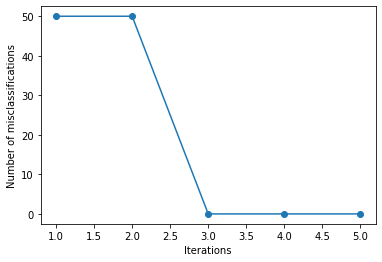

In [6]:
# classify setosa and others

y1 = np.where(labels == 0, 1, -1) 

n_iter=5
fit(n_iter, X, y1)

Iteration:  61
Weights:  [-14.   45.  -58.2 -36.4 -65.6]
Errors:  50


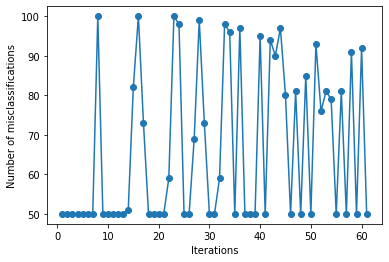

Iteration:  61
Weights:  [  62.          197.2        -132.90726172 -303.2           5.70205197]
Errors:  16


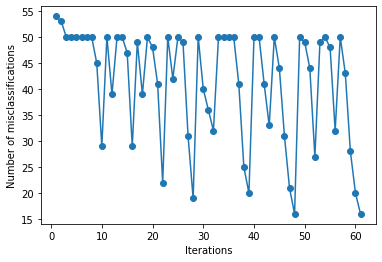

In [7]:
# classify virginica and others
i = -7
j = -2
iris = load_iris()
features = iris.data.T
features[1] = i*features[1]**j + i*features[1]**(j-1)
features[3] = i*features[3]**j + i*features[3]**(j-1)
new_X = np.column_stack(features)

y2 = np.where(labels == 1, 1, -1) 

n_iter=61

fit(n_iter, X, y2)
fit(n_iter, new_X, y2)

In [8]:
# code to determine errors for each model parameters & test the parameters

# n_iter = 100

# for i in range(-8,9):
#   for j in range(-8,9):
#     W = np.zeros(1 + X.shape[1])
#     errors_ = []       
#     iris = load_iris()
#     features = iris.data.T
#     features[1] = i*features[1]**j + i*features[1]**(j-1)
#     features[3] = i*features[3]**j + i*features[3]**(j-1)
#     new_X = np.column_stack(features)
#     for k in range(n_iter):
#       for l, (xi, target) in enumerate(zip(new_X,y2)):
#           update = target - predict(W, xi)
#           W[1:] += update*xi
#           W[0] += update
#       # errors on whole dataset
#       errors = 0
#       for l, (xi, target) in enumerate(zip(new_X, y2)):
#           if predict(W, xi) != target:
#               errors += 1
#       # -------------------------------------------
#       errors_.append(errors) 
#       k += 1
#     print("i = ", i, ", j = ", j)
#     plot_errors(errors_)

def transform_n_fit(i, j, n_iter, X, y):
  W = np.zeros(1 + X.shape[1])
  errors_ = []       
  iris = load_iris()
  features = iris.data.T
  features[2] = i*features[2]**j + i*features[2]**(j-1)
  features[3] = i*features[3]**j + i*features[3]**(j-1)
  new_X = np.column_stack(features)
  for i in range(n_iter):
      for j, (xi, target) in enumerate(zip(new_X,y2)):
          update = target - predict(W, xi)
          W[1:] += update*xi
          W[0] += update
      # errors on whole dataset 
      errors = 0
      for j, (xi, target) in enumerate(zip(new_X, y2)):
          if predict(W, xi) != target:
              errors += 1
      # -------------------------------------------
      errors_.append(errors) 
      i += 1
      if i == n_iter:
        print ("Iteration: ", i)
        print("Weights: ", W)
        print("Errors: ", errors)
  plot_errors(errors_)
  
#transform_n_fit(-3, -2, 100, X, y2)


Iteration:  100
Weights:  [ -10.  -108.4  -70.6  140.4  118.2]
Errors:  3


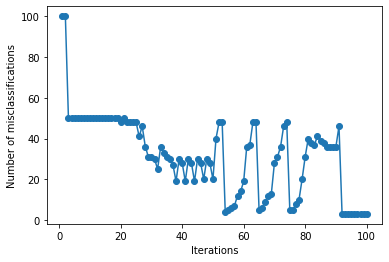

In [9]:
# classify virginica and others

labels = np.concatenate((setosa_label, versicolor_label, virginica_label))
X = np.concatenate((X_setosa, X_versicolor, X_virginica))

y3 = np.where(labels == 2, 1, -1) 

n_iter=100
fit(n_iter, X, y3)


In [10]:
n_iter = 100

# for i in range(-8,9):
#   for j in range(-8,9):
#     W = np.zeros(1 + X.shape[1])
#     errors_ = []       
#     iris = load_iris()
#     features = iris.data.T
#     #features[2] = i*features[2]**j + i*features[2]**(j-1)
#     #features[3] = i*features[3]**j + i*features[3]**(j-1)
#     new_X = np.column_stack(features)
#     for k in range(n_iter):
#       for l, (xi, target) in enumerate(zip(new_X,y3)):
#           update = target - predict(W, xi)
#           W[1:] += update*xi
#           W[0] += update
#       # errors on whole dataset
#       errors = 0
#       for l, (xi, target) in enumerate(zip(new_X, y3)):
#           if predict(W, xi) != target:
#               errors += 1
#       # -------------------------------------------
#       errors_.append(errors) 
#       k += 1
#     print("i = ", i, ", j = ", j)
#     plot_errors(errors_)

**3 linear classifiers done, now combining into multiclass classifier**

1st : Weights:  [  2.    2.2   7.2 -10.4  -4.4]

2nd : Weights:  [  36.         -129.         -218.31987772  367.6         540.01168888]

3rd : Weights:  [ -10.  -108.4  -70.6  140.4  118.2]

In [11]:
W1 = [  2,   2.2,  7.2, -10.4,  -4.4 ]
W2 = [  62, 197.2, -132.90726172, -303.2, 5.70205197 ]
W3 = [ -10.,  -108.4,  -70.6,  140.4,  118.2]

# W2 = [-14.,   45.,  -58.2, -36.4, -65.6] non-transformed
# W2 = [  62, 197.2, -132.90726172, -303.2, 5.70205197 ] transformed with i = 3, j = -2

In [12]:
i = -7
j = -2
iris = load_iris()
features = iris.data.T
features[1] = i*features[1]**j + i*features[1]**(j-1)
features[3] = i*features[3]**j + i*features[3]**(j-1)
new_X = np.column_stack(features)

def predict3(W1, W2, W3, X):
  """ Return class label after each setp """
  res1 = predict(W1, X)
  res2 = predict(W2, new_X)
  res3 = predict(W3, X)
  
  res = []

  for (r1, r2, r3) in (zip(res1, res2, res3)):
    if (r1 == 1):
      res.append(0)
    elif (r3 == 1):
      res.append(2)
    else :
      res.append(1)
  return res


def check(X, y):
  # errors on whole dataset 
  errors = 0

  for j, (res, target) in enumerate(zip(predict3(W1, W2, W3, X), y)):
      if res != target:
          errors += 1
          
  print("Error: ", errors)

In [13]:
check(X, labels)

Error:  3


## Task 2: k-Fold Cross-Validation

Choose one of your three linear classifiers from Task 1, use k-Fold Cross-Validation to estimate the out of sample performance of the selected classifier. Explore the effect of different $k$ values on the model performance and discuss the results, use $k =3$, $k = 5$, and $k = 10$. In your report:

- include the code of the k-fold validation.
- Discuss the results.

**Help functions**

In [14]:
from itertools import permutations

def train(W, Z):
  for j, (xi, target) in enumerate(zip(Z[:, :4],Z[:, 4])):
    update = target - predict(W, xi)
    W[1:] += update*xi
    W[0] += update
    #print("Weights for j = ", j, " : ", W)
  return W

def test(W, Z):
  errors = 0      
  print("Weights used: ",W)
  for j, (xi, target) in enumerate(zip(Z[:, :4],Z[:, 4])):
    if predict(W, xi) != target:
        errors += 1
  # -------------------------------------------
  print("Errors: ", errors)
  return errors

# select training range and combine
def select_training_data3(start1, start2, Z):
  end1 = start1 + 50
  end2 = start2 + 50
  return np.concatenate((Z[start1:end1], Z[start2:end2]))

def select_training_data5(start1, start2, start3, start4, Z):
  end1 = start1 + 30
  end2 = start2 + 30
  end3 = start3 + 30
  end4 = start4 + 30
  return np.concatenate((Z[start1:end1], Z[start2:end2], Z[start3:end3], Z[start4:end4]))

def select_training_data10(start1, start2, start3, start4, start5, start6, start7, start8, start9, Z):
  end1 = start1 + 15
  end2 = start2 + 15
  end3 = start3 + 15
  end4 = start4 + 15
  end5 = start5 + 15
  end6 = start6 + 15
  end7 = start7 + 15
  end8 = start8 + 15
  end9 = start9 + 15
  return np.concatenate((Z[start1:end1], Z[start2:end2], Z[start3:end3], Z[start4:end4], Z[start5:end5], Z[start6:end6], Z[start7:end7], Z[start8:end8]))

# select test range
def select_test_data(start, Z, k):
  end = start + int(150/k)
  return Z[start:end]

def plot_errors2(error):
    plt.plot(range(1, len(error) + 1), error,marker='o')
    plt.xlabel('k')
    plt.ylabel('Number of misclassifications')
    plt.show() 

**k = 3**

(0, 50, 100)
(0, 100, 50)
(50, 100, 0)

k =  0

------------- Training --------------
Training data selected starting index:  0   50

------------- Test -------------
Test data selected starting index:  100
Weights used:  [ 0.  -0.4 -7.4  1.4 -5.2]
Errors:  22

k =  1

------------- Training --------------
Training data selected starting index:  0   100

------------- Test -------------
Test data selected starting index:  50
Weights used:  [  2.    0.4 -13.2   9.   -8.8]
Errors:  15

k =  2

------------- Training --------------
Training data selected starting index:  50   100

------------- Test -------------
Test data selected starting index:  0
Weights used:  [  0.   -9.  -25.8   3.4 -14.6]
Errors:  14



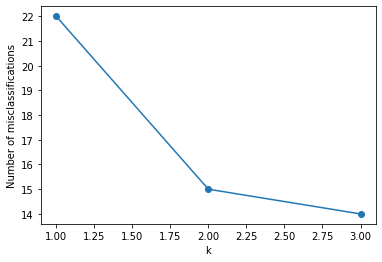

In [15]:
# initialise k, W
k = 3
W_training = np.zeros(5)
n = []

# classifying virginica & others
iris = load_iris()

y = np.where(labels == 1, 1, -1)
Z = np.insert(iris.data, 4, y, axis=1)

# dividing data into k parts and get a list of the first index
for i in range(k):
  n.append(int(150/k*i))

# shuffle the index
p = permutations(n)
select_range = list([(0, 50, 100),(0, 100, 50),(50,100,0)])

# print permutation
for i in select_range:
  print(i)

print()

# shuffle X
np.random.shuffle(Z)

# select X, train for k-1 times, test once
errors_ = []
for i in range(k):
  print("k = ", i)
  print()
  Z_train = select_training_data3(select_range[i][0], select_range[i][1], Z)
  print ("------------- Training --------------")
  print("Training data selected starting index: ", select_range[i][0], " ", select_range[i][1])
  W_training = train(W_training, Z_train)

  Z_test = select_test_data(select_range[i][2], Z, k)
  print()
  print ("------------- Test -------------")
  print("Test data selected starting index: ", select_range[i][2])
  errors_.append(test(W_training, Z_test))
  print()
  
plot_errors2(errors_)

**k = 5**

(0, 30, 60, 90, 120)
(0, 30, 60, 120, 90)
(0, 30, 90, 120, 60)
(0, 60, 90, 120, 30)
(30, 60, 90, 120, 0)

k =  0

------------- Training --------------
Training data selected starting index:  0   30   60   90

------------- Test -------------
Test data selected starting index:  120
Weights used:  [  2.   -1.6 -11.6  10.2   0.2]
Errors:  8

k =  1

------------- Training --------------
Training data selected starting index:  0   30   60   120

------------- Test -------------
Test data selected starting index:  90
Weights used:  [  6.    1.2 -16.   16.   -4.2]
Errors:  11

k =  2

------------- Training --------------
Training data selected starting index:  0   30   90   120

------------- Test -------------
Test data selected starting index:  60
Weights used:  [ 10.    7.  -21.2  15.  -12. ]
Errors:  10

k =  3

------------- Training --------------
Training data selected starting index:  0   60   90   120

------------- Test -------------
Test data selected starting index:  30
Weights

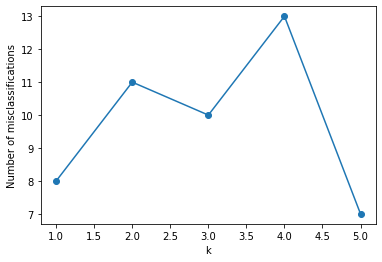

In [16]:
# initialise k, W
k = 5
W_training = np.zeros(5)
n = []

# classifying virginica & others
iris = load_iris()

y = np.where(labels == 1, 1, -1)
Z = np.insert(iris.data, 4, y, axis=1)

# dividing data into k parts and get a list of the first index
for i in range(k):
  n.append(int(150/k*i))

# shuffle the index
p = permutations(n)
select_range = list([(0, 30, 60, 90, 120), (0, 30, 60, 120, 90), (0, 30, 90, 120, 60), (0, 60, 90, 120, 30), (30, 60, 90, 120, 0)])

# print permutation
for i in select_range:
  print(i)

print()

# shuffle X
np.random.shuffle(Z)

# select X, train for k-1 times, test once
errors_ = []
for i in range(k):
  print("k = ", i)
  print()
  Z_train = select_training_data5(select_range[i][0], select_range[i][1], select_range[i][2], select_range[i][3], Z)
  print ("------------- Training --------------")
  print("Training data selected starting index: ", select_range[i][0], " ", select_range[i][1], " ", select_range[i][2], " ", select_range[i][3])
  W_training = train(W_training, Z_train)

  Z_test = select_test_data(select_range[i][4], Z, k)
  print()
  print ("------------- Test -------------")
  print("Test data selected starting index: ", select_range[i][4])
  errors_.append(test(W_training, Z_test))
  print()
  
plot_errors2(errors_)

**k = 10**

(135, 120, 105, 90, 75, 30, 60, 15, 0, 45)
(135, 120, 105, 90, 75, 30, 60, 15, 45, 0)
(135, 120, 105, 90, 75, 30, 60, 45, 0, 15)
(135, 120, 105, 90, 75, 45, 0, 15, 30, 60)
(135, 120, 105, 90, 75, 45, 0, 15, 60, 30)
(135, 120, 105, 0, 15, 60, 30, 45, 75, 90)
(135, 120, 105, 0, 15, 60, 30, 45, 90, 75)
(0, 15, 30, 45, 60, 75, 135, 90, 105, 120)
(0, 15, 30, 45, 60, 75, 135, 90, 120, 105)
(0, 15, 30, 45, 60, 75, 120, 90, 105, 135)

k =  0

------------- Training --------------
Training data selected starting index:  135   120   105   90   75   30   60   15   0

------------- Test -------------
Test data selected starting index:  45
Weights used:  [  0.  -13.6 -23.    4.   -7.2]
Errors:  4
Weights used:  [  0.  -13.6 -23.    4.   -7.2]
Errors:  4

k =  1

------------- Training --------------
Training data selected starting index:  135   120   105   90   75   30   60   15   45

------------- Test -------------
Test data selected starting index:  0
Weights used:  [  4.   -8.  -29.6   5.4 -13.

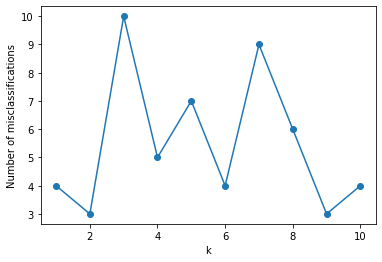

In [17]:
# initialise k, W
k = 10
W_training = np.zeros(5)
n = []

# classifying virginica & others
iris = load_iris()

y = np.where(labels == 1, 1, -1)
Z = np.insert(iris.data, 4, y, axis=1)

# dividing data into k parts and get a list of the first index
for i in range(k):
  n.append(int(150/k*i))

# shuffle the index
p = permutations(n)
select_range = list([(135, 120, 105, 90, 75, 30, 60, 15, 0, 45),
                     (135, 120, 105, 90, 75, 30, 60, 15, 45, 0),
                     (135, 120, 105, 90, 75, 30, 60, 45, 0, 15),
                     (135, 120, 105, 90, 75, 45, 0, 15, 30, 60),
                     (135, 120, 105, 90, 75, 45, 0, 15, 60, 30),
                     (135, 120, 105, 0, 15, 60, 30, 45, 75, 90),
                     (135, 120, 105, 0, 15, 60, 30, 45, 90, 75),
                     (0, 15, 30, 45, 60, 75, 135, 90, 105, 120),
                     (0, 15, 30, 45, 60, 75, 135, 90, 120, 105),
                     (0, 15, 30, 45, 60, 75, 120, 90, 105, 135)])

# print permutation
for i in select_range:
  print(i)

print()

# shuffle X
np.random.shuffle(Z)

# select X, train for k-1 times, test once
errors_ = []
for i in range(k):
  print("k = ", i)
  print()
  Z_train = select_training_data10(select_range[i][0], select_range[i][1], select_range[i][2], select_range[i][3], select_range[i][4], select_range[i][5], select_range[i][6], select_range[i][7], select_range[i][8], Z)
  print ("------------- Training --------------")
  print("Training data selected starting index: ", select_range[i][0], " ", select_range[i][1], " ", select_range[i][2], " ", select_range[i][3], " ", select_range[i][4], " ", select_range[i][5], " ", select_range[i][6], " ", select_range[i][7], " ", select_range[i][8])
  W_training = train(W_training, Z_train)

  Z_test = select_test_data(select_range[i][9], Z, k)
  print()
  print ("------------- Test -------------")
  print("Test data selected starting index: ", select_range[i][9])
  test(W_training, Z_test)
  errors_.append(test(W_training, Z_test))
  print()
  
plot_errors2(errors_)

## Regression

In this exercise you will experiment with a regression using non-linear polynomial transform of features. We will use the boston house-prices dataset again.

The figure below display the feature values on x axis and their transformed values on y axis in green. The labels i.e., outputs of the target function are displayed in blue, which is median value of owner-occupied homes in $1000’s.

The code below transforms the selected 1 out of 13 features with degree $d$ and coefficient $c$ according to

\begin{equation}
z_i = c_x x_{x}^{d_x} + c_{x_1} x_{x}^{d_{x-1}} + c_{x_2} x_{x}^{d_{x-2}}
\end{equation}

In [18]:
import pandas as pd 
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
@interact

def plot_reg(featurex = (0,12,1),d_x = (-8,10,1),c_x_0 =(-8,10,0.1),c_x_1 =(-8,10,0.1),c_x_2 =(-8,10,0.1),bias =(-20,40,1)):
  boston = load_boston()
  features = boston.data.T
  ofeatures = features.copy()

  features[featurex] = c_x_0*features[featurex]**d_x + c_x_1*features[featurex]**(d_x-1)+c_x_2*features[featurex]**(d_x-2)+bias

  Z=features[featurex:(featurex+1)]
  ZT=np.transpose(Z)
  X_train, X_test, y_train, y_test = train_test_split(ZT, boston.target, test_size=0.2, random_state=0)
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  y_tr_pred = lr.predict(X_train)
  y_te_pred = lr.predict(X_test)

  plt.figure(figsize = (15,5))
  plt.scatter(X_train, y_train, alpha=0.4,s=100, c='blue')
  #w = lr.coef_
  #b=lr.intercept_
  #plt.scatter(X_train, b+w*X_train,  alpha=0.4,s=100, c='red')
  plt.scatter(X_train, y_tr_pred, alpha=0.4,s=100,c='green')
  plt.scatter(X_test, y_te_pred, alpha=0.4,s=100,c='red')
  plt.xlabel(boston.feature_names[featurex])
  plt.ylabel('MEDV') 
  df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_te_pred.flatten()})
  print(df)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_te_pred))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_te_pred))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_te_pred)))

interactive(children=(IntSlider(value=6, description='featurex', max=12), IntSlider(value=1, description='d_x'…

# Coursework

## Task 3: 

Find 1 of the 13 features, its transformation with polynomial, degrees and coefficients that best approximate the target output. You can change the non-linear function in the code and range of values for the parameters. In your report:

- Report your formula, parameters, errors and figures in the coursework report.




In [21]:
from typing import List

In [27]:
def safe_power(val, pow):
  """Returns val to the power of pow safely i.e. ignoring values 0"""
  if val == 0:
    return 0
  
  return val ** pow

In [28]:
def single_feat_find_coef(feature_index: int = 0, powers: List[int] = []):
  boston = load_boston()
  features = boston.data.T[feature_index:feature_index+1]

  # This step enriches our dataset by taking power of the features
  for power in powers:
    new_feat = np.array([np.array([safe_power(pt, power) for pt in features[0]]).T])
    features = np.append(features, new_feat, axis = 0)
  
  Z=features
  ZT=np.transpose(Z)
  X_train, X_test, y_train, y_test = train_test_split(ZT, boston.target, test_size=0.2, random_state=0)
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  y_tr_pred = lr.predict(X_train)
  y_te_pred = lr.predict(X_test)

  df = pd.DataFrame([[
          str([1] + powers),
          metrics.mean_absolute_error(y_test, y_te_pred),
          metrics.mean_squared_error(y_test, y_te_pred),
          np.sqrt(metrics.mean_squared_error(y_test, y_te_pred))
      ]],
      columns = ["Powers", "MAE", "MSE", "RMSE"]
  ).set_index("Powers")

  # We return the df which contains the errors i.e. the performance of our model
  # coef and intercepts are returned as well since we need these values for later
  return df, lr.coef_, lr.intercept_

In [36]:
power_ls = [
    [2],
    [2,3],
    [2,3,4],
    [-1],
    [-1, 2],
    [-2,-3,2]
]

df = single_feat_find_coef(feature_index=5)[0]
coef_ls = []
intercept_ls = []

for ls in power_ls:
  tmp_df, tmp_coef, tmp_intercept = single_feat_find_coef(feature_index=5, powers=ls)
  coef_ls.append(tmp_coef)
  intercept_ls.append(tmp_intercept)
  df = df.append(tmp_df)

df

,MAE,MSE,RMSE
Powers,,,
[1],4.324741,46.907352,6.848894
"[1, 2]",4.070498,39.794731,6.308307
"[1, 2, 3]",4.063204,39.825762,6.310766
"[1, 2, 3, 4]",4.337235,41.553926,6.446233
"[1, -1]",4.047036,39.332155,6.271535
"[1, -1, 2]",4.025769,39.330246,6.271383
"[1, -2, -3, 2]",4.146646,40.704603,6.380016


## Task 4:

Modify the code above to make use of all 13 features simultaneously, their transformation with polynomials, degrees and coefficients that minimize the regression error. In your report:

- Report your formula, parameters, errors and figures in the coursework report.

In [ ]:
import pandas as pd 
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics

def plot_reg():
  boston = load_boston()
  features = boston.data.T
  ofeatures = features.copy()

  # features[featurex] = c_x_0*features[featurex]**d_x + c_x_1*features[featurex]**(d_x-1)+c_x_2*features[featurex]**(d_x-2)+bias
  # Z=features[featurex:(featurex+1)]

  Z=features
  ZT=np.transpose(Z)
  X_train, X_test, y_train, y_test = train_test_split(ZT, boston.target, test_size=0.2, random_state=0)
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  y_tr_pred = lr.predict(X_train)
  y_te_pred = lr.predict(X_test)

  # plt.figure(figsize = (15,5))
  # plt.scatter(X_train, y_train, alpha=0.4,s=100, c='blue')
  #w = lr.coef_
  #b=lr.intercept_
  #plt.scatter(X_train, b+w*X_train,  alpha=0.4,s=100, c='red')
  # plt.scatter(X_train, y_tr_pred, alpha=0.4,s=100,c='green')
  # plt.scatter(X_test, y_te_pred, alpha=0.4,s=100,c='red')
  # plt.xlabel(boston.feature_names[featurex])
  # plt.ylabel('MEDV') 
  # df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_te_pred.flatten()})
  # print(df)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_te_pred))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_te_pred))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_te_pred)))

plot_reg()

In [ ]:
def plot_reg_power(powers: List[int] = []):
  boston = load_boston()
  features = boston.data.T

  # This step enriches our dataset by taking power of the features
  for power in powers:
    for feat in range(0, 13):
      new_feat = np.array([np.array([safe_power(pt, power) for pt in features[feat]]).T])
      features = np.append(features, new_feat, axis = 0)
  
  Z=features
  ZT=np.transpose(Z)
  X_train, X_test, y_train, y_test = train_test_split(ZT, boston.target, test_size=0.2, random_state=0)
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  y_tr_pred = lr.predict(X_train)
  y_te_pred = lr.predict(X_test)

  df = pd.DataFrame([[
          str([1] + powers),
          metrics.mean_absolute_error(y_test, y_te_pred),
          metrics.mean_squared_error(y_test, y_te_pred),
          np.sqrt(metrics.mean_squared_error(y_test, y_te_pred))
      ]],
      columns = ["Powers", "MAE", "MSE", "RMSE"]
  ).set_index("Powers")

  # We return the df which contains the errors i.e. the performance of our model
  # coef and intercepts are returned as well since we need these values for later
  return df, lr.coef_, lr.intercept_


In [ ]:
# You can try changing the power_ls values to try out other power combinations
# By default we already have power 1 in the function so there is no need to add power 1

power_ls = [
    [2],
    [2,3],
    [2,3,4],
    [-1],
    [-1, 2]
]

df = plot_reg_power()[0]
coef_ls = []
intercept_ls = []

for ls in power_ls:
  tmp_df, tmp_coef, tmp_intercept = plot_reg_power(ls)
  coef_ls.append(tmp_coef)
  intercept_ls.append(tmp_intercept)
  df = df.append(tmp_df)

In [ ]:
# Note that function with the best performance is the [1,2]
# The hypothesis is that using too many power values enriches our data too much so even though [1,2,3] gives us a more rich data set, the performance is worse than [1,2]
# You can also try using the VC inequality to argue this scenario

df

In [ ]:
# Lets say we value RMSE over MAE, [1,2] gives us the best results
# Lets in that case get the weights of [1,2] linear reg
# This is given by coef_ls[0] and its intercept is given by intercept_ls[0]

# Note that we have 26 coefficients.
# We started with 13 features and for each of the features we squared them.
# The squaring process added another 13 features so we ended up with 26 features.

print("Coef length: ", len(coef_ls[0]))
print(coef_ls[0])
print(intercept_ls[0])

In [ ]:
def multi_linear_reg():
  ''' Plugging in the values we got from the previous step into our transformation.
  Theoretically it should give us very similar if not the same results.
  '''

  boston = load_boston()
  features = boston.data.T
  ofeatures = features.copy()

  for idx in range(0, 13):
    # plugging in the coefficients and the intercept
    features[idx] = coef_ls[0][idx]*features[idx] + coef_ls[0][idx+13]*features[idx]**2 + intercept_ls[0]

  Z=features
  ZT=np.transpose(Z)
  X_train, X_test, y_train, y_test = train_test_split(ZT, boston.target, test_size=0.2, random_state=0)
  lr = LinearRegression()
  lr.fit(X_train, y_train)
  y_tr_pred = lr.predict(X_train)
  y_te_pred = lr.predict(X_test)

  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_te_pred))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_te_pred))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_te_pred)))

multi_linear_reg()

In [ ]:
# We notice that the error values tallies when we separate out the x and x**2 term in the previous step. This is expected.
# Theoretically we could have optimized the power and coefficients for each of the features but this process will be very time & computationally expensive.